**Tugas 1**
- Menjelajah dan menganalisis data
- Menemukan pola pembelian
- Menemukan tren item (Menghitung jumlah item yang terjual untuk setiap produk untuk masing masing periode)

**Deskripsi Data**

1. InvoiceNo: ID Unik sebagai identifikasi setiap transaksi
2. StockCode: ID Unik sebagai identifikasi setiap produk
3. Description: Deskripsi produk
4. Quantity: Jumlah item yang dibeli
5. InvoiceDate: Tanggal transaksi
6. UnitPrice: Harga produk per item
7. CustomerID: ID Unik sebagai identifikasi setiap pelanggan
8. Country: Negara asal pelanggan

# Preprocessing Data

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from datetime import datetime as dt

In [124]:
df = pd.read_csv('ecommerce_data.csv', encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    535874 non-null  object 
 2   Description  534420 non-null  object 
 3   Quantity     535874 non-null  float64
 4   InvoiceDate  535874 non-null  object 
 5   UnitPrice    535874 non-null  float64
 6   CustomerID   403182 non-null  float64
 7   Country      535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


In [126]:
df.isnull().sum()

InvoiceNo           0
StockCode        6035
Description      7489
Quantity         6035
InvoiceDate      6035
UnitPrice        6035
CustomerID     138727
Country          6035
dtype: int64

In [127]:
# Menghapus data yang kosong
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [128]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [129]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [130]:
# Mengubah tipe data atribur CustomerID menjadi string
df['CustomerID'] = df['CustomerID'].astype(str)
df.dtypes

C:\Users\akmal\AppData\Local\Temp\ipykernel_7720\1780693741.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [131]:
# Mengubah atribut invoice date menjadi tipe data datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

C:\Users\akmal\AppData\Local\Temp\ipykernel_7720\3942105146.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



InvoiceNo              object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [132]:
df['Quantity'] = df['Quantity'].astype(np.int64)
df.dtypes

C:\Users\akmal\AppData\Local\Temp\ipykernel_7720\3256651660.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403182 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    403182 non-null  object        
 1   StockCode    403182 non-null  object        
 2   Description  403182 non-null  object        
 3   Quantity     403182 non-null  int64         
 4   InvoiceDate  403182 non-null  datetime64[ns]
 5   UnitPrice    403182 non-null  float64       
 6   CustomerID   403182 non-null  object        
 7   Country      403182 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.7+ MB


In [134]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [135]:
# Menghitung pendapatan dari setiap transaksi
df['InvoiceRevenue'] = df['Quantity'] * df['UnitPrice']
df.head(10)

C:\Users\akmal\AppData\Local\Temp\ipykernel_7720\3958236635.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [136]:
# Menampilkan Quantity negatif
df[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceRevenue
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [137]:
# Mengambil data dengan Quantity > 0
df = df[df['Quantity'] > 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


Hasil analisis diatas kita dapat mengetahui, ketika InvoiceNo pada awal kata terdapat huruf 'C' maka transaksi tersebut merupakan transaksi pengembalian barang. Oleh karena itu, kita perlu menghapus transaksi pengembalian barang tersebut dan mengambil transaksi yang tidak mengandung huruf 'C' pada atribut InvoiceNo.

In [138]:
df[df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceRevenue
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,0.0
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,0.0
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,0.0
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,0.0
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0.0


In [139]:
# Mengambil data dengan UnitPrice > 0
df = df[df['UnitPrice'] > 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


Dari data dapat diketahui, terdapat beberapa nilai dari atribut unitPrice yang bernilai 0, ini terjadi mungkin karena kesalahan input data. Oleh karena itu, kita perlu menghapus data yang memiliki nilai 0 pada atribut unitPrice.

In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,394303.0,12.762561,125.692942,1.000,2.00,6.00,12.00,74215.00
UnitPrice,394303.0,3.128657,22.196395,0.001,1.25,1.95,3.75,8142.75
InvoiceRevenue,394303.0,22.036989,156.267607,0.001,4.89,11.90,19.80,77183.60


# EDA

C:\Users\akmal\AppData\Local\Temp\ipykernel_7720\1277674014.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



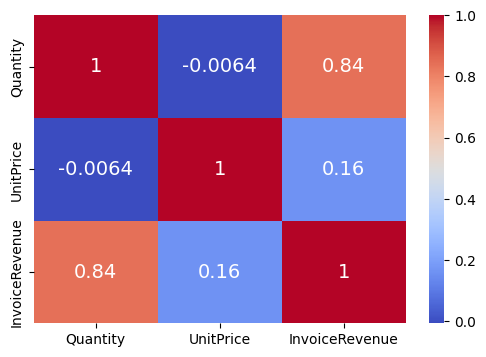

In [141]:
# Menampilkan korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 14})
plt.show()

Dapat kita menyimpulkan bahwa UnitPrice tidak memiliki korelasi yang tinggi dengan atribut apapun

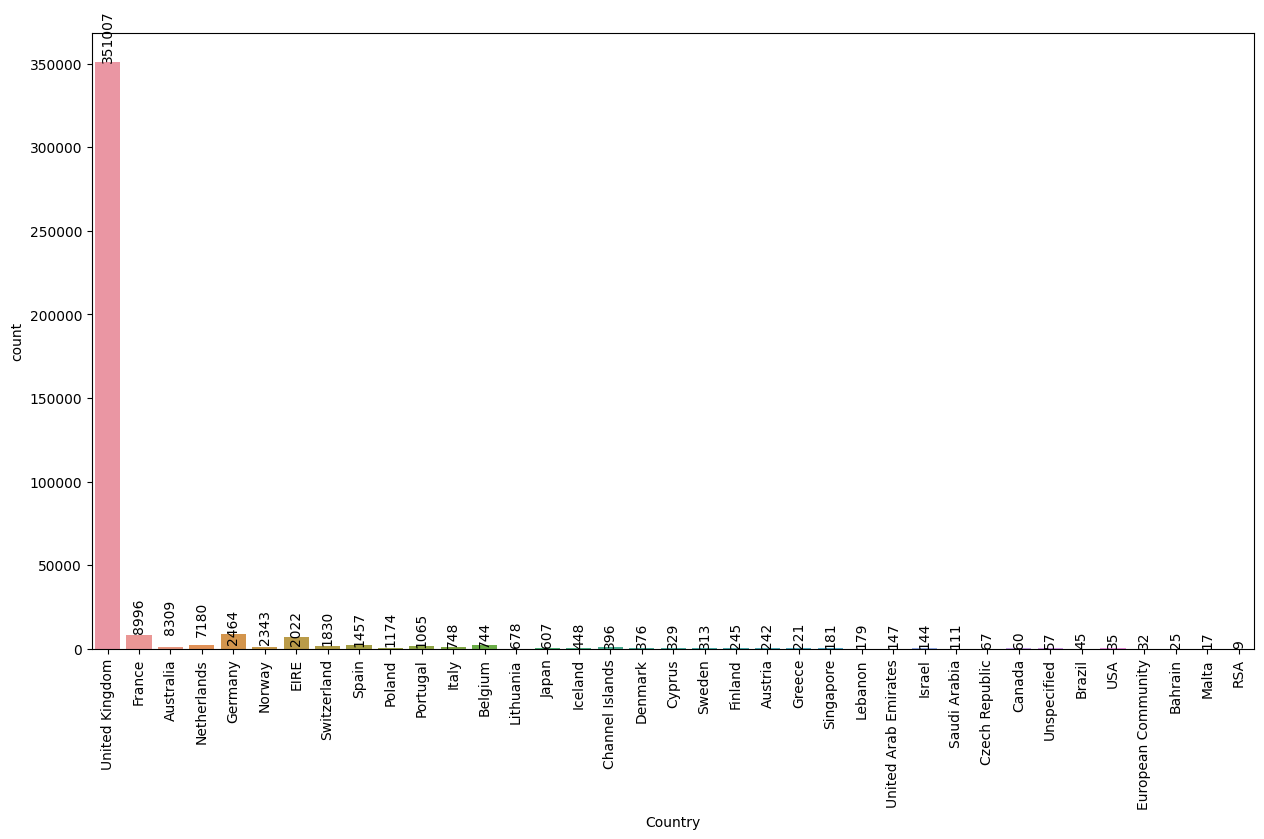

In [142]:
# Analisis penjualan berdasarkan negara 
plt.figure(figsize=(15, 8))
sns.countplot(x='Country', data=df)
for i, v in enumerate(df['Country'].value_counts().values):
    plt.text(i, v, str(v), ha='center', size=10, rotation=90, va='bottom')
plt.xticks(rotation=90)
plt.show()

Dari grafik diatas, kita dapat mengetahui bahwa negara dengan total penjualan terbanyak adalah negara United Kindom

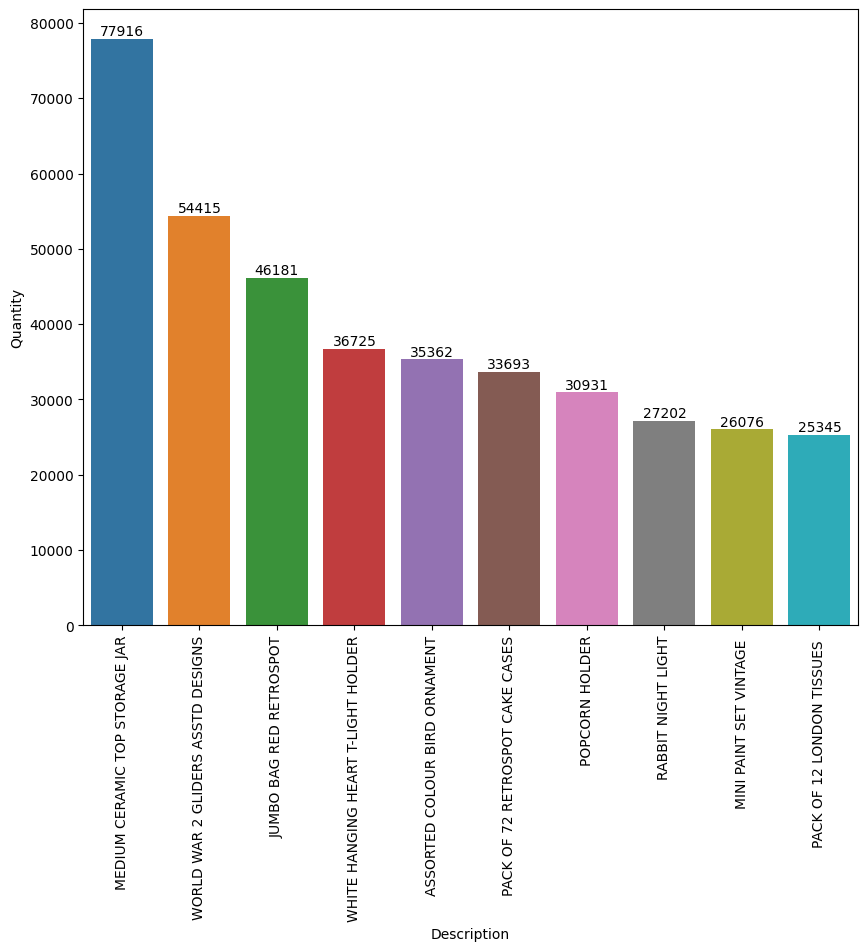

In [143]:
# Analisis 10 produk terlaris
plt.figure(figsize=(10, 8))
d = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=d.index, y=d.values)
for i, v in enumerate(d.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Description')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(1, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(2, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(3, 0, 'MEDIUM CERAMIC TOP STORAGE JAR'),
  Text(4, 0, 'POSTAGE'),
  Text(5, 0, 'PARTY BUNTING'),
  Text(6, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(7, 0, 'Manual'),
  Text(8, 0, 'RABBIT NIGHT LIGHT'),
  Text(9, 0, 'CHILLI LIGHTS')])

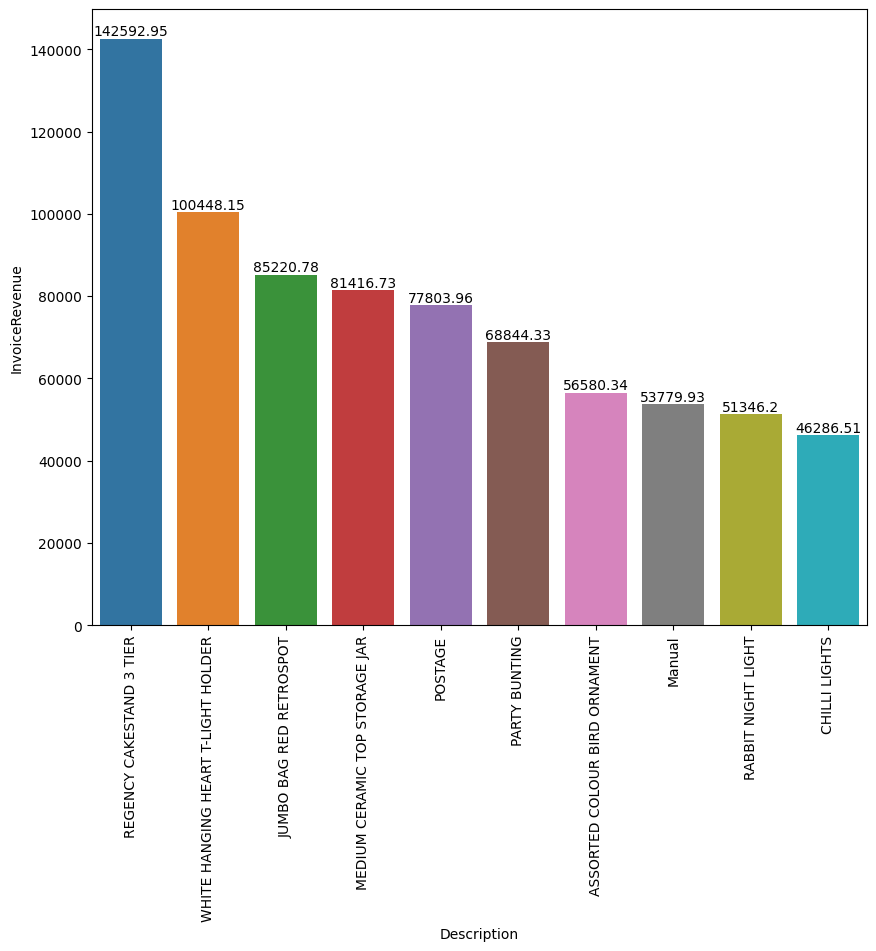

In [144]:
# Analisis 10 produk terlaris berdasarkan pendapatan tertinggi
plt.figure(figsize=(10, 8))
d = df.groupby('Description')['InvoiceRevenue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=d.index, y=d.values)
for i, v in enumerate(d.values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.xlabel('Description')
plt.ylabel('InvoiceRevenue')
plt.xticks(rotation=90)

In [145]:
# Proses penguraian informasi waktu dari atribut InvoiceDate
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Year'] = df['InvoiceDate'].dt.year
df['Hour'] = df['InvoiceDate'].dt.hour

C:\Users\akmal\AppData\Local\Temp\ipykernel_7720\3482068535.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\akmal\AppData\Local\Temp\ipykernel_7720\3482068535.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\akmal\AppData\Local\Temp\ipykernel_7720\3482068535.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [146]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceRevenue,Day,Month,Year,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,2010,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December,2010,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,8
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,Wednesday,December,2010,8
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,Wednesday,December,2010,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,Wednesday,December,2010,8
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,Wednesday,December,2010,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,Wednesday,December,2010,8


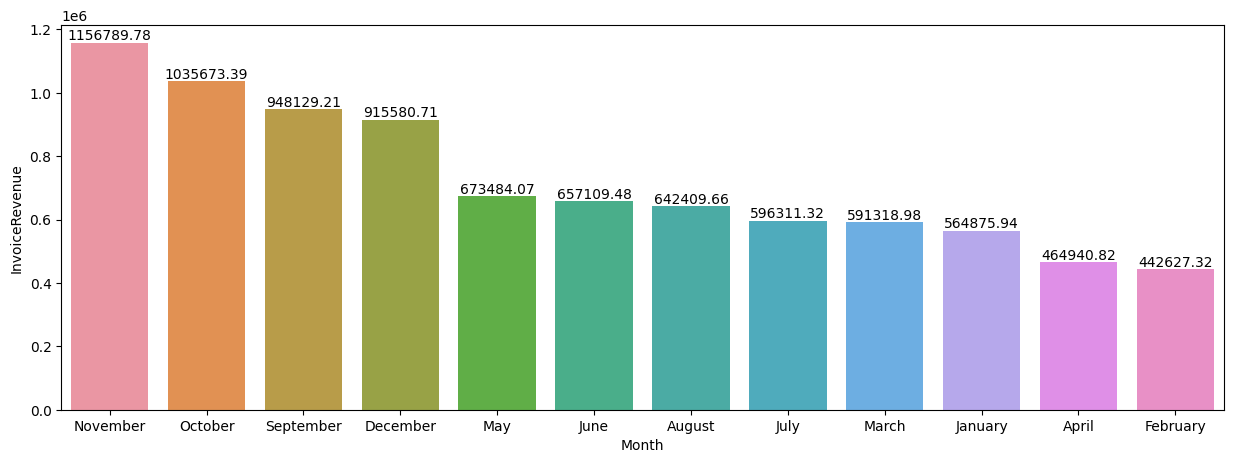

In [147]:
# Analisis penjualan bulanan
plt.figure(figsize=(15, 5))
m = df.groupby('Month', as_index=False)['InvoiceRevenue'].sum().sort_values(by='InvoiceRevenue', ascending=False)
sns.barplot(data=m, x='Month', y='InvoiceRevenue')
for i, v in enumerate(m['InvoiceRevenue'].values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.show()

Dari grafik diatas, kita dapat mengetahui bahwa bulan dengen total penjualan terbanyak adalah bulan November, ini terjadi mungkin karena pada bulan November terdapat hari-hari besar seperti Black Friday dan Cyber Monday, persiapan untuk hari Natal, dan Hari-hari libur nasional, sehingga banyak orang yang berbelanja pada bulan tersebut.

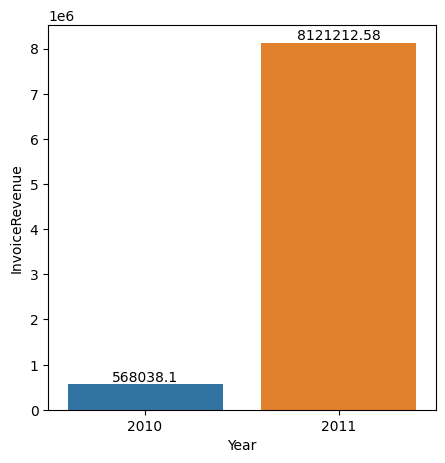

In [148]:
# Analisis penjualan tahunan
plt.figure(figsize=(5, 5))
y = df.groupby('Year', as_index=False)['InvoiceRevenue'].sum()
sns.barplot(data=y, x='Year', y='InvoiceRevenue')
for i, v in enumerate(y['InvoiceRevenue'].values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.show()

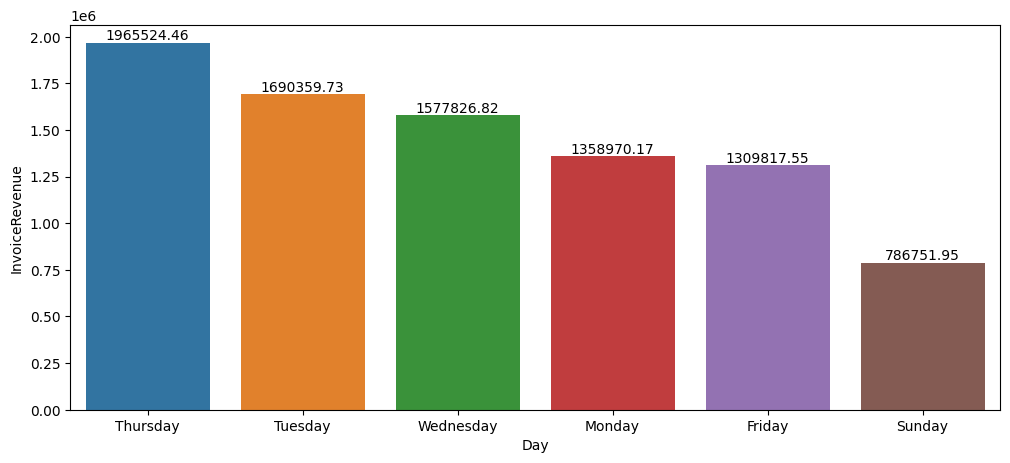

In [149]:
# Analisis penjualan harian
plt.figure(figsize=(12, 5))
d = df.groupby('Day', as_index=False)['InvoiceRevenue'].sum().sort_values(by='InvoiceRevenue', ascending=False)
sns.barplot(data=d, x='Day', y='InvoiceRevenue')
for i, v in enumerate(d['InvoiceRevenue'].values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.show()

Dari grafik diatas, kita dapat mengetahui bahwa hari dengan total penjualan terbanyak adalah hari Kamis, ini terjadi mungkin karena pada hari Kamis banyak orang yang berbelanja untuk mempersiapkan kebutuhan pada akhir pekan, selain itu, grafik diatas tidak menunjukkan adanya penjualan pada hari sabtu, hal ini mungkin terjadi karena pada hari sabtu banyak orang yang berlibur dan tidak berbelanja atau perusahaan tidak beroperasi pada hari sabtu.

In [150]:
df['Hour'] = df['Hour'].astype(str)

C:\Users\akmal\AppData\Local\Temp\ipykernel_7720\2571509826.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



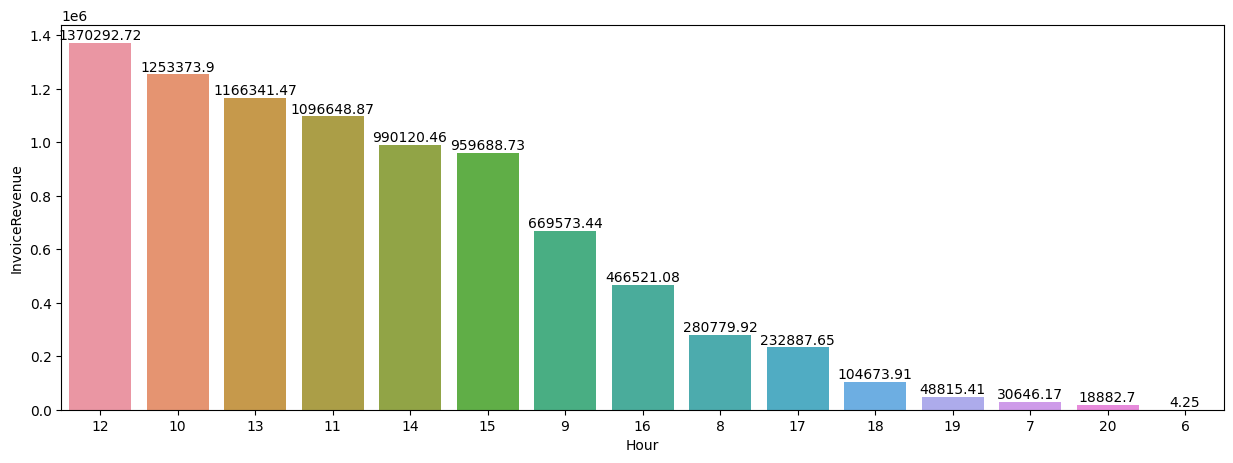

In [151]:
# Analisis penjualan per jam
plt.figure(figsize=(15, 5))
h = df.groupby('Hour', as_index=False)['InvoiceRevenue'].sum().sort_values(by='InvoiceRevenue', ascending=False)
sns.barplot(data=h, x='Hour', y='InvoiceRevenue')
for i, v in enumerate(h['InvoiceRevenue'].values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.show()

Dari grafik diatas, kita dapat mengetahui bahwa jam dengan total penjualan terbanyak berada di jam 12, ini terjadi mungkin karena jam 12 merupakan jam makan siang, waktu luang di tengah hari, dan biasanya beberapa toko dan e-commerce menawarkan promosi khusus pada jam 12 siang, sehingga banyak orang yang melakukan pembelian pada jam tersebut

C:\Users\akmal\AppData\Local\Temp\ipykernel_7720\715967837.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



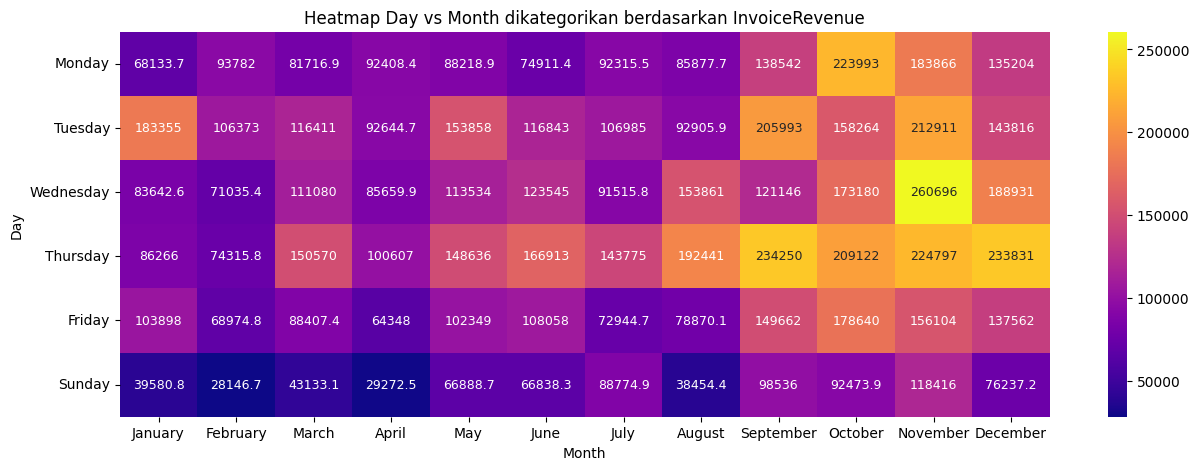

In [152]:
# Membuat heatmap di kelompokkan berdasarkan hari dan bulan dengan InvoiceRevenue sebagai nilai
plt.figure(figsize=(15, 5))
hm = df.groupby(
    ['Day', 'Month'], 
    as_index=False)[
        'InvoiceRevenue'].sum().pivot(
            'Day', 
            'Month', 
            'InvoiceRevenue').reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday'], 
                                      columns=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
sns.heatmap(hm, annot=True, cmap='plasma', annot_kws={'size': 9}, fmt='g')
plt.title('Heatmap Day vs Month dikategorikan berdasarkan InvoiceRevenue')
plt.show()

Dari heatmap diatas, kita dapat mengetahui bahwa InvoiceRevenue terbesar adalah di hari rabu pada bulan November 

C:\Users\akmal\AppData\Local\Temp\ipykernel_7720\1863507240.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



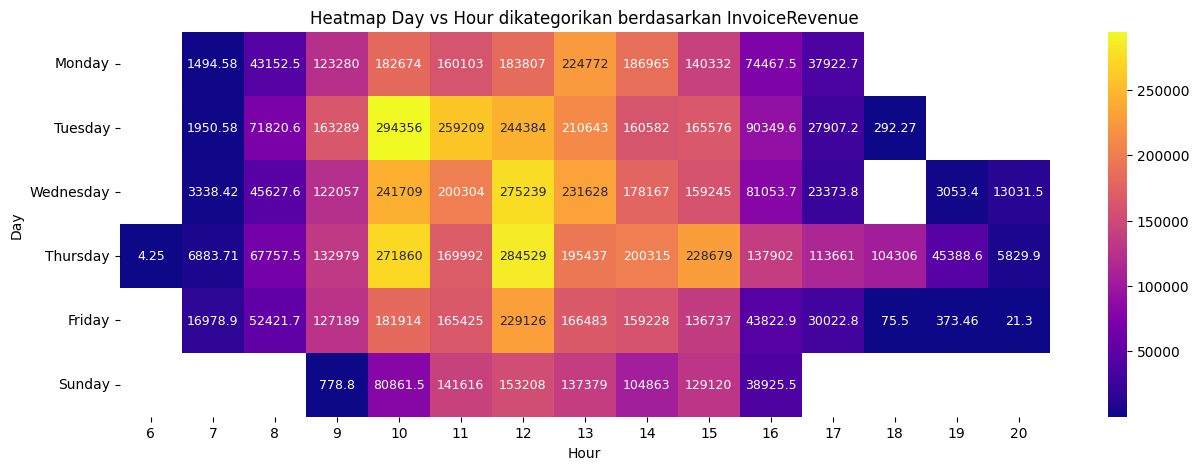

In [153]:
# Membuat heatmap di kelompokkan berdasarkan hari dan jam dengan InvoiceRevenue sebagai nilai
plt.figure(figsize=(15, 5))
hm = df.groupby(
    ['Day', 'Hour'], 
    as_index=False)[
        'InvoiceRevenue'].sum().pivot(
            'Day', 
            'Hour', 
            'InvoiceRevenue').reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday'],
                                      columns=['6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'])
sns.heatmap(hm, annot=True, cmap='plasma', annot_kws={'size': 9}, fmt='g')
plt.title('Heatmap Day vs Hour dikategorikan berdasarkan InvoiceRevenue')
plt.show()

In [154]:
df['Description'].nunique()

3773

In [155]:
# Analisis deskripsi penjualan berdasarkan InvoiceRevenue
d = df.groupby('Description', as_index=False)['InvoiceRevenue'].sum().sort_values(by='InvoiceRevenue', ascending=False)
d

,Description,InvoiceRevenue
2685,REGENCY CAKESTAND 3 TIER,142592.950
3597,WHITE HANGING HEART T-LIGHT HOLDER,100448.150
1718,JUMBO BAG RED RETROSPOT,85220.780
1919,MEDIUM CERAMIC TOP STORAGE JAR,81416.730
2530,POSTAGE,77803.960
...,...,...
2366,PINK CRYSTAL GUITAR PHONE CHARM,0.850
3459,VINTAGE BLUE TINSEL REEL,0.840
2845,SET 12 COLOURING PENCILS DOILEY,0.650
1585,HEN HOUSE W CHICK IN NEST,0.420


Dari heatmap diatas, kita dapat mengetahui bahwa invoice revenue terbesar adalah di hari kamis pada jam 10

# Metode Analisis RFM

Analisis RFM (Recency, Frequency, Monetary) adalah metode analisis yang digunakan dalam pemasaran dan analisis data pelanggan untuk mengklasifikasikan pelanggan berdasarkan perilaku pembelian mereka. RFM menggabungkan tiga dimensi penting:

1. Recency (Ketepatan Waktu): Menunjukkan berapa lama sejak pelanggan terakhir kali melakukan transaksi atau pembelian. Biasanya diukur dalam satuan waktu tertentu, seperti hari, minggu, atau bulan. Semakin baru transaksi terjadi, semakin tinggi nilai Recency.
2. Frequency (Frekuensi): Mengukur seberapa sering pelanggan melakukan transaksi atau pembelian selama periode waktu tertentu. Semakin sering pelanggan melakukan pembelian, semakin tinggi nilai Frequency.
3. Monetary (Moneter): Mencerminkan total nilai moneter atau jumlah uang yang dihabiskan oleh pelanggan dalam jangka waktu tertentu. Semakin tinggi total pengeluaran pelanggan, semakin tinggi nilai Monetary.

In [156]:
# Pengambilan atribut yang diperlukan
df2 = df[['CustomerID', 'InvoiceDate', 'InvoiceRevenue', 'Quantity', 'UnitPrice']]
df2

,CustomerID,InvoiceDate,InvoiceRevenue,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,15.30,6,2.55
1,17850.0,2010-12-01 08:26:00,20.34,6,3.39
2,17850.0,2010-12-01 08:26:00,22.00,8,2.75
3,17850.0,2010-12-01 08:26:00,20.34,6,3.39
4,17850.0,2010-12-01 08:26:00,20.34,6,3.39
...,...,...,...,...,...
541904,12680.0,2011-12-09 12:50:00,10.20,12,0.85
541905,12680.0,2011-12-09 12:50:00,12.60,6,2.10
541906,12680.0,2011-12-09 12:50:00,16.60,4,4.15
541907,12680.0,2011-12-09 12:50:00,16.60,4,4.15


In [157]:
# Mengurutkan secara ascending berdasarkan InvoiceDate
df2 = df2.sort_values(by='InvoiceDate', ascending=True)
df2

,CustomerID,InvoiceDate,InvoiceRevenue,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,15.30,6,2.55
1,17850.0,2010-12-01 08:26:00,20.34,6,3.39
2,17850.0,2010-12-01 08:26:00,22.00,8,2.75
3,17850.0,2010-12-01 08:26:00,20.34,6,3.39
4,17850.0,2010-12-01 08:26:00,20.34,6,3.39
...,...,...,...,...,...
541896,12680.0,2011-12-09 12:50:00,19.80,12,1.65
541895,12680.0,2011-12-09 12:50:00,19.80,12,1.65
541907,12680.0,2011-12-09 12:50:00,16.60,4,4.15
541900,12680.0,2011-12-09 12:50:00,15.00,4,3.75


In [158]:
# Pengambilan waktu berdasarkan terakhir kalinya terjadi transaksi
present = dt(2011, 12, 10)

In [159]:
# Melakukan proses segmentasi pelanggan menggunakan metode analisis RFM
seg = df2.groupby('CustomerID').agg({'InvoiceDate': lambda date: (present - date.max()).days + 1,
                                    'CustomerID': lambda num: len(num),
                                    'InvoiceRevenue': lambda price: price.sum()})
seg.columns = ['Recency', 'Frequency', 'Monetary']
seg

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,181,4299.80
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [160]:
# Menampilkan nilai 12348.0 pada atribut CustomerID
df2[df2['CustomerID'] == '12348.0']

,CustomerID,InvoiceDate,InvoiceRevenue,Quantity,UnitPrice
34099,12348.0,2010-12-16 19:09:00,240.00,6,40.00
34093,12348.0,2010-12-16 19:09:00,104.40,72,1.45
34098,12348.0,2010-12-16 19:09:00,50.40,120,0.42
34097,12348.0,2010-12-16 19:09:00,13.20,24,0.55
34096,12348.0,2010-12-16 19:09:00,50.40,120,0.42
34095,12348.0,2010-12-16 19:09:00,13.20,24,0.55
34094,12348.0,2010-12-16 19:09:00,69.60,48,1.45
34092,12348.0,2010-12-16 19:09:00,40.80,48,0.85
34085,12348.0,2010-12-16 19:09:00,13.20,24,0.55
34090,12348.0,2010-12-16 19:09:00,41.76,144,0.29


In [161]:
# Menguji RFM Analisis
(present - dt(2011, 9, 25)).days == 76

True

Karena bernilai True, maka kita dapat menyimpulkan bahwa data RFM tersebut sudah benar

In [162]:
# Melakukan normalisasi data pada atribut Recency, Frequency, dan Monetary
scaler = MinMaxScaler()
rfm_normalized = scaler.fit_transform(seg[['Recency', 'Frequency', 'Monetary']])

# Membuat dataframe dari array hasil normalisasi
seg['Recency'] = rfm_normalized[:, 0]
seg['Frequency'] = rfm_normalized[:, 1]
seg['Monetary'] = rfm_normalized[:, 2]
seg.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,0.871314,0.000000,0.276846
12347.0,0.005362,0.023214,0.015413
12348.0,0.201072,0.003869,0.006436
12349.0,0.048257,0.009286,0.006294
12350.0,0.831099,0.002063,0.001189


In [163]:
# Customer dengan recency terendah, frekuensi tertinggi, dan monetary tertinggi adalah top customer
# Memberikan penilaian segmentasi yang lebih terperinci pada setiap dimensi segmentasi
seg['r_value'] = pd.qcut(seg['Recency'], 4, ['4','3','2','1'])
seg['f_value'] = pd.qcut(seg['Frequency'], 4, ['1','2','3','4'])
seg['m_value'] = pd.qcut(seg['Monetary'], 4, ['1','2','3','4'])
seg

,Recency,Frequency,Monetary,r_value,f_value,m_value
CustomerID,,,,,,
12346.0,0.871314,0.000000,0.276846,1,1,4
12347.0,0.005362,0.023214,0.015413,4,4,4
12348.0,0.201072,0.003869,0.006436,2,2,4
12349.0,0.048257,0.009286,0.006294,3,3,4
12350.0,0.831099,0.002063,0.001189,1,1,2
...,...,...,...,...,...,...
18280.0,0.742627,0.001161,0.000637,1,1,1
18281.0,0.482574,0.000774,0.000279,1,1,1
18282.0,0.018767,0.001419,0.000628,4,1,1


- Pada atribut r_value, penilaian segmentasi ditetapkan sebagai ['4', '3', '2', '1']. Pemberian label ini menunjukkan kategori tingkat tinggi (4) hingga tingkat rendah (1) dalam hal Recency, di mana nilai '4' menunjukkan pelanggan dengan waktu terakhir membeli yang paling baru, sementara nilai '1' menunjukkan pelanggan dengan waktu terakhir membeli yang paling lama.
- Pada atribut f_value, penilaian segmentasi ditetapkan sebagai ['1', '2', '3', '4']. Pemberian label ini menunjukkan kategori tingkat rendah (1) hingga tingkat tinggi (4) dalam hal Frequency, di mana nilai '4' menunjukkan pelanggan dengan frekuensi pembelian yang paling sering, sementara nilai '1' menunjukkan pelanggan dengan frekuensi pembelian yang paling jarang.
- Pada atribut m_value, penilaian segmentasi ditetapkan sebagai ['1', '2', '3', '4']. Pemberian label ini menunjukkan kategori tingkat rendah (1) hingga tingkat tinggi (4) dalam hal Monetary, di mana nilai '4' menunjukkan pelanggan dengan total pengeluaran yang paling banyak, sementara nilai '1' menunjukkan pelanggan dengan total pengeluaran yang paling sedikit.

In [164]:
seg['RFM_Score'] = seg.r_value.astype(str) + seg.f_value.astype(str) + seg.m_value.astype(str)
seg

,Recency,Frequency,Monetary,r_value,f_value,m_value,RFM_Score
CustomerID,,,,,,,
12346.0,0.871314,0.000000,0.276846,1,1,4,114
12347.0,0.005362,0.023214,0.015413,4,4,4,444
12348.0,0.201072,0.003869,0.006436,2,2,4,224
12349.0,0.048257,0.009286,0.006294,3,3,4,334
12350.0,0.831099,0.002063,0.001189,1,1,2,112
...,...,...,...,...,...,...,...
18280.0,0.742627,0.001161,0.000637,1,1,1,111
18281.0,0.482574,0.000774,0.000279,1,1,1,111
18282.0,0.018767,0.001419,0.000628,4,1,1,411


In [165]:
# Menghitung total nilai RFM
seg['RFM_Total'] = seg.r_value.astype(int) + seg.f_value.astype(int) + seg.m_value.astype(int)
seg

,Recency,Frequency,Monetary,r_value,f_value,m_value,RFM_Score,RFM_Total
CustomerID,,,,,,,,
12346.0,0.871314,0.000000,0.276846,1,1,4,114,6
12347.0,0.005362,0.023214,0.015413,4,4,4,444,12
12348.0,0.201072,0.003869,0.006436,2,2,4,224,8
12349.0,0.048257,0.009286,0.006294,3,3,4,334,10
12350.0,0.831099,0.002063,0.001189,1,1,2,112,4
...,...,...,...,...,...,...,...,...
18280.0,0.742627,0.001161,0.000637,1,1,1,111,3
18281.0,0.482574,0.000774,0.000279,1,1,1,111,3
18282.0,0.018767,0.001419,0.000628,4,1,1,411,6


In [166]:
seg['RFM_Score'].unique()

array(['114', '444', '224', '334', '112', '111', '133', '344', '423',
       '244', '222', '433', '122', '411', '233', '323', '412', '223',
       '434', '134', '322', '332', '333', '312', '123', '124', '311',
       '212', '422', '214', '234', '221', '213', '144', '121', '342',
       '424', '211', '313', '243', '242', '113', '432', '414', '324',
       '343', '231', '143', '132', '443', '413', '321', '421', '442',
       '131', '232', '331', '431', '314', '142', '441'], dtype=object)

In [167]:
seg['RFM_Total'].sort_values(ascending=False).unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3])

In [168]:
def classify_customer(df):
        if df['RFM_Total'] == 12:
                return 'Top Customer'
        elif df['RFM_Total'] >= 10:
                return 'Loyal Customer'
        elif df['RFM_Total'] >= 8:
                return 'Big Spender'
        elif df['RFM_Total'] >= 6:
                return 'Almost Lost'
        elif df['RFM_Total'] >= 4:
                return 'Lost Customer'
        else:
                return 'Lost Cheap Customer'

Penjelasan kondisi klasifikasi:
1. 'Top Customer': Jika total skor RFM adalah 12, menunjukkan pelanggan terbaik yang memiliki nilai tinggi dalam setiap dimensi RFM.
2. 'Loyal Customer': Jika total skor RFM lebih besar atau sama dengan 10, menunjukkan pelanggan yang setia dengan tingkat kesetiaan yang tinggi.
3. 'Big Spender': Jika total skor RFM lebih besar atau sama dengan 8, menunjukkan pelanggan yang cenderung menghabiskan jumlah uang yang besar dalam pembelian mereka.
4. 'Almost Lost': Jika total skor RFM lebih besar atau sama dengan 6, menunjukkan pelanggan yang hampir kehilangan minat dalam pembelian.
5. 'Lost Customer': Jika total skor RFM lebih besar atau sama dengan 4, menunjukkan pelanggan yang telah kehilangan minat dalam pembelian.
6. 'Lost Cheap Customer': Jika total skor RFM kurang dari 4, menunjukkan pelanggan yang telah kehilangan minat dan cenderung melakukan pembelian dengan nilai yang rendah.

In [169]:
# Menambahkan atribut CustomerSegmentation
seg['CustomerSegmentation'] = seg.apply(classify_customer, axis=1)
seg

,Recency,Frequency,Monetary,r_value,f_value,m_value,RFM_Score,RFM_Total,CustomerSegmentation
CustomerID,,,,,,,,,
12346.0,0.871314,0.000000,0.276846,1,1,4,114,6,Almost Lost
12347.0,0.005362,0.023214,0.015413,4,4,4,444,12,Top Customer
12348.0,0.201072,0.003869,0.006436,2,2,4,224,8,Big Spender
12349.0,0.048257,0.009286,0.006294,3,3,4,334,10,Loyal Customer
12350.0,0.831099,0.002063,0.001189,1,1,2,112,4,Lost Customer
...,...,...,...,...,...,...,...,...,...
18280.0,0.742627,0.001161,0.000637,1,1,1,111,3,Lost Cheap Customer
18281.0,0.482574,0.000774,0.000279,1,1,1,111,3,Lost Cheap Customer
18282.0,0.018767,0.001419,0.000628,4,1,1,411,6,Almost Lost


In [170]:
# Membuat grafik pie chart untuk menampilkan persentase customer berdasarkan CustomerSegmentation
fig = px.pie(seg, values=seg['CustomerSegmentation'].value_counts(), names=seg['CustomerSegmentation'].value_counts().index, title='Customer Segmentation')
fig.show()

Dari grafik pie chart diatas, kita dapat menyimpulkan bahwa pelanggan dengan persentasi tertinggi adalah pelanggan dengan kategori 'Almost Lost' dan 'Lost Customer', ini menunjukkan bahwa pelanggan yang telah kehilangan minat dalam pembelian memiliki persentase yang tinggi. Mungkin ini terjadi karena ada pelanggan yang hanya membeli sebagian kecil produk yang dijual sehingga pelanggan tersebut tidak tertarik untuk membeli produk lainnya, mungkin juga karena pelanggan tersebut tidak puas dengan produk yang telah dibeli, mungkin juga karena pelanggan tersebut tidak puas dengan pelayanan yang diberikan, atau mungkin terjadinya perubahan kebutuhan setiap pelanggan.

In [171]:
# Menampilkan 10 customer dengan RFM Score tertinggi
seg[seg['RFM_Total'] == 12].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,r_value,f_value,m_value,RFM_Score,RFM_Total,CustomerSegmentation
CustomerID,,,,,,,,,
14646.0,0.002681,0.265669,1.000000,4,4,4,444,12,Top Customer
18102.0,0.000000,0.055455,0.931376,4,4,4,444,12,Top Customer
17450.0,0.021448,0.043332,0.697840,4,4,4,444,12,Top Customer
14911.0,0.002681,0.726464,0.513862,4,4,4,444,12,Top Customer
14156.0,0.024129,0.179262,0.417526,4,4,4,444,12,Top Customer
17511.0,0.005362,0.123549,0.326145,4,4,4,444,12,Top Customer
16684.0,0.010724,0.035079,0.236798,4,4,4,444,12,Top Customer
13694.0,0.008043,0.072350,0.232130,4,4,4,444,12,Top Customer
14096.0,0.010724,0.647408,0.231567,4,4,4,444,12,Top Customer


In [172]:
# Menampilkan 10 customer dengan RFM Score terendah
seg[seg['RFM_Total'] == 3].sort_values('Monetary', ascending=True).head(10)

,Recency,Frequency,Monetary,r_value,f_value,m_value,RFM_Score,RFM_Total,CustomerSegmentation
CustomerID,,,,,,,,,
16446.0,0.549598,0.000129,0.000000,1,1,1,111,3,Lost Cheap Customer
16738.0,0.796247,0.000000,0.000003,1,1,1,111,3,Lost Cheap Customer
17956.0,0.667560,0.000000,0.000035,1,1,1,111,3,Lost Cheap Customer
15823.0,0.997319,0.000000,0.000043,1,1,1,111,3,Lost Cheap Customer
17763.0,0.705094,0.000000,0.000043,1,1,1,111,3,Lost Cheap Customer
17102.0,0.699732,0.000000,0.000081,1,1,1,111,3,Lost Cheap Customer
13120.0,0.638070,0.000000,0.000099,1,1,1,111,3,Lost Cheap Customer
17408.0,0.436997,0.000129,0.000107,1,1,1,111,3,Lost Cheap Customer
16765.0,0.788204,0.000000,0.000112,1,1,1,111,3,Lost Cheap Customer


In [173]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Total', 'CustomerSegmentation'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[seg.index, seg['Recency'], seg['Frequency'], seg['Monetary'], seg['RFM_Total'], seg['CustomerSegmentation']],
                fill_color='lavender',
                align='left'))
])

fig.show()